# MNIST 손글씨 분류 - 신경망

### 1. 필요한 모듈 임포트 및 데이터 로딩

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

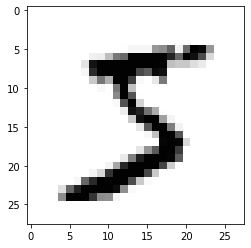

In [ ]:
# plt.imshow() : 이미지 데이터를 시각화 - 이미지(2차원 데이터)를 사용

plt.imshow(X_train[0], cmap='Greys')
plt.show()

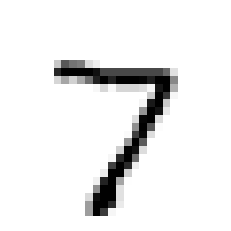

In [ ]:
plt.imshow(X_test[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
import sys
for row in X_train[0]:
    for x in row:
        sys.stdout.write(f'{x:3d}')
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [ ]:
# uint8 : unsigned int (8bit) -> 0 ~ 255

type(X_train), X_train.dtype

(numpy.ndarray, dtype('uint8'))

### 2. 데이터 전처리

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

#### 정규화 (이미지 데이터의 경우 0~1사이의 값을 가질 때 가장 정확하다고 함)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

#### 이미지 차원 변경 : 2차원 --> 1차원

In [ ]:
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

#### 다중분류이므로 One-hot-Encoding 시행

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

### 3. 모델 정의/설정/실행/평가

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential([
                    Dense(512, input_dim = 784, activation='relu'),
                    Dense(48, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 48)                24624     
                                                                 
 dense_2 (Dense)             (None, 10)                490       
                                                                 
Total params: 427,034
Trainable params: 427,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_path = 'mnist_dnn.h5'

checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose = 1)
early_stop = EarlyStopping(patience=10)

In [ ]:
hist = model.fit(X_train, Y_train, validation_split=0.2, epochs = 100, batch_size = 200, 
                 verbose = 0, callbacks = [checkpoint, early_stop])


Epoch 00001: val_loss improved from inf to 0.15756, saving model to mnist_dnn.h5

Epoch 00002: val_loss improved from 0.15756 to 0.11145, saving model to mnist_dnn.h5

Epoch 00003: val_loss improved from 0.11145 to 0.09489, saving model to mnist_dnn.h5

Epoch 00004: val_loss improved from 0.09489 to 0.08462, saving model to mnist_dnn.h5

Epoch 00005: val_loss did not improve from 0.08462

Epoch 00006: val_loss improved from 0.08462 to 0.08093, saving model to mnist_dnn.h5

Epoch 00007: val_loss improved from 0.08093 to 0.07590, saving model to mnist_dnn.h5

Epoch 00008: val_loss did not improve from 0.07590

Epoch 00009: val_loss did not improve from 0.07590

Epoch 00010: val_loss did not improve from 0.07590

Epoch 00011: val_loss did not improve from 0.07590

Epoch 00012: val_loss did not improve from 0.07590

Epoch 00013: val_loss did not improve from 0.07590

Epoch 00014: val_loss did not improve from 0.07590

Epoch 00015: val_loss did not improve from 0.07590

Epoch 00016: val_lo

In [ ]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0647 - accuracy: 0.9810


[0.06470876187086105, 0.9810000061988831]

In [ ]:
result = best_model.evaluate(X_test, Y_test, verbose=0)
dnn_loss = round(result[0], 4)
dnn_acc = round(result[1], 4)
print(dnn_loss, dnn_acc)

0.0647 0.981


### 4. 학습과정 시각화

In [ ]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

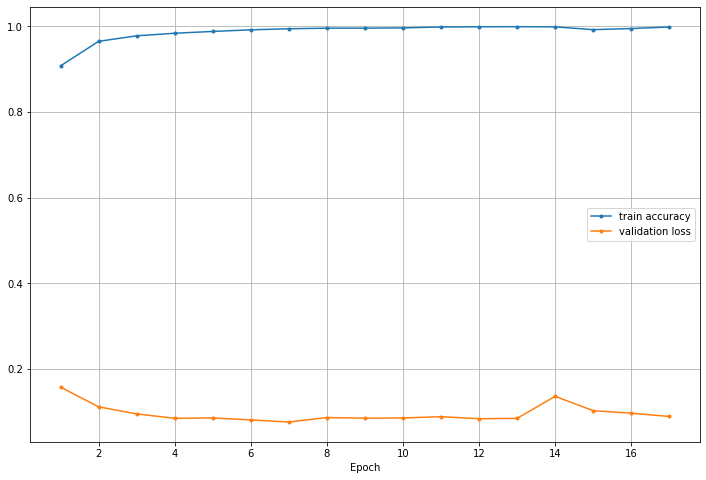

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(xs, y_acc, 'o-', ms = 3, label = 'train accuracy')
plt.plot(xs, y_vloss, 'o-', ms = 3, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

### 5. SVM, GridSearchCV로 실행시

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
svc = SVC(random_state=2022)

In [ ]:
params = {'C' : [10, 50, 100]}

grid_svc = GridSearchCV(
    svc, param_grid = params, scoring = 'accuracy', cv = 3, n_jobs = -1
)
%time grid_svc.fit(X_train, y_train)

CPU times: user 5min 1s, sys: 2.63 s, total: 5min 4s
Wall time: 43min 21s


GridSearchCV(cv=3, estimator=SVC(random_state=2022), n_jobs=-1,
             param_grid={'C': [10, 50, 100]}, scoring='accuracy')

In [ ]:
grid_svc.best_params_

{'C': 10}

In [ ]:
grid_svc.best_estimator_.score(X_test, y_test)

0.9837